### Is the model able to generate correct answers based on the context provided?


In [31]:
# %pip install numpy==1.26.4 pandas==1.3.3 seaborn==0.13 matplotlib==3.4.3
%pip install langchain langchain-openai langchain-ollama

Note: you may need to restart the kernel to use updated packages.


In [8]:
from langchain_openai import ChatOpenAI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
import seaborn as sns
from model import OpenEndedQuestion, CloseEndedQuestion

load_dotenv()

# - verify that llm is able to answer questions based on the context
# - veryfy that llm is able to generate a question based on the context
# - Is LLM able to automatically grade the students' answers?

# - some recommendation algorithms
# - pdf parser to text or markdown

True

Load SQUAD dataset

In [ ]:
splits = {'train': 'plain_text/train-00000-of-00001.parquet', 'validation': 'plain_text/validation-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/rajpurkar/squad/" + splits["validation"])

In [17]:
df.head()

,id,title,context,question,answers
0,56be4db0acb8001400a502ec,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team represented the AFC at Super Bo...,"{'text': ['Denver Broncos', 'Denver Broncos', ..."
1,56be4db0acb8001400a502ed,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team represented the NFC at Super Bo...,"{'text': ['Carolina Panthers', 'Carolina Panth..."
2,56be4db0acb8001400a502ee,Super_Bowl_50,Super Bowl 50 was an American football game to...,Where did Super Bowl 50 take place?,"{'text': ['Santa Clara, California', 'Levi's S..."
3,56be4db0acb8001400a502ef,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team won Super Bowl 50?,"{'text': ['Denver Broncos', 'Denver Broncos', ..."
4,56be4db0acb8001400a502f0,Super_Bowl_50,Super Bowl 50 was an American football game to...,What color was used to emphasize the 50th anni...,"{'text': ['gold', 'gold', 'gold'], 'answer_sta..."


Define dataclasses for the questions

In [9]:
llm = ChatOpenAI(temperature=0, model="gpt-4o", api_key=os.getenv("OPEN_AI_KEY"))

## Can LLM generate the answer to the question based on the context provided?

In [29]:
SAMPLE_SIZE = 25

sample_df = df.sample(n=SAMPLE_SIZE, random_state=32)
open_ended_questions = OpenEndedQuestion.from_dataframe(sample_df)

llm_answers = []
for question in open_ended_questions:
    llm_answer = question.generate_llm_response(llm)
    llm_answers.append(llm_answer)



In [30]:
for question, answer in zip(open_ended_questions, llm_answers):
    print(f"Question: {question.question}")
    print(f"Generated Answer: {answer}")
    print(f"Correct Answers: {question.example_correct_answers}")
    print("\n")

Question: What does most of the HD material use as a standard?
Generated Answer: Most of the HD material uses the DVB-S2 standard.
Correct Answers: ['DVB-S2', 'DVB-S2', 'DVB-compliant MPEG-2']


Question: What physical quantities do not have direction?
Generated Answer: Physical quantities that do not have direction are called scalar quantities.
Correct Answers: ['denoted scalar quantities', 'scalar quantities', 'denoted scalar quantities', 'scalar quantities', 'scalar quantities']


Question: What was he studying that gave him the teleforce weapon idea?
Generated Answer: Tesla was studying the Van de Graaff generator when he conceived the idea for the teleforce weapon.
Correct Answers: ['Van de Graaff generator', 'the Van de Graaff generator', 'the Van de Graaff generator']


Question: Which sitcom ended its broadcast run for ABC in 1983?
Generated Answer: Laverne & Shirley ended its broadcast run for ABC in 1983.
Correct Answers: ['Laverne & Shirley', 'Laverne & Shirley', 'Laverne & 

## Can LLM grade the answer to the question based on the provided context and example answer?

LLM answer: Most of the HD material uses the DVB-S2 standard.
Example correct answers:  ['DVB-S2', 'DVB-S2', 'DVB-compliant MPEG-2']
LLM answer: Physical quantities that do not have direction are called scalar quantities.
Example correct answers:  ['denoted scalar quantities', 'scalar quantities', 'denoted scalar quantities', 'scalar quantities', 'scalar quantities']
LLM answer: Tesla was studying the Van de Graaff generator when he conceived the idea for the teleforce weapon.
Example correct answers:  ['Van de Graaff generator', 'the Van de Graaff generator', 'the Van de Graaff generator']
LLM answer: Laverne & Shirley ended its broadcast run for ABC in 1983.
Example correct answers:  ['Laverne & Shirley', 'Laverne & Shirley', 'Laverne & Shirley']
LLM answer: The minimum requirement to teach in Canada is a post-secondary Bachelor's Degree.
Example correct answers:  ["a post-secondary degree Bachelor's Degree", "a post-secondary degree Bachelor's Degree", "post-secondary degree Bachelo

(array([ 0.,  0.,  0.,  0., 25.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <BarContainer object of 5 artists>)

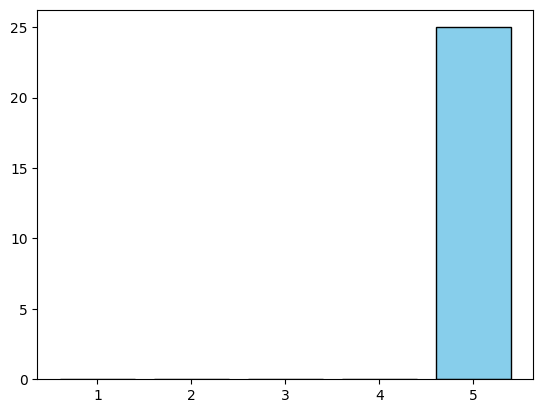

In [87]:
llm_results = []
for llm_answer, question in zip(llm_answers, open_ended_questions):
    grade = question.validate_answer(llm_answer, llm)
    llm_results.append(grade)
    print(f"LLM answer: {llm_answer}")
    print("Example correct answers: ", question.example_correct_answers)
# plot grade results on scale from 1 to 5
plt.hist(llm_results, bins=np.arange(1, 7) - 0.5, rwidth=0.8, color='skyblue', edgecolor='black')
    

LLM Answer:  The first Doctor Who soundtrack featured tracks from the first two series.
Question:  What does most of the HD material use as a standard?
Correct Answer:  ['DVB-S2', 'DVB-S2', 'DVB-compliant MPEG-2']
LLM Grade:  1
LLM Answer:  France and the Netherlands.
Question:  What physical quantities do not have direction?
Correct Answer:  ['denoted scalar quantities', 'scalar quantities', 'denoted scalar quantities', 'scalar quantities', 'scalar quantities']
LLM Grade:  1
LLM Answer:  Konstantin Mereschkowski suggested the origin of chloroplasts in 1905.
Question:  What was he studying that gave him the teleforce weapon idea?
Correct Answer:  ['Van de Graaff generator', 'the Van de Graaff generator', 'the Van de Graaff generator']
LLM Grade:  1
LLM Answer:  Open forest and grassland.
Question:  Which sitcom ended its broadcast run for ABC in 1983?
Correct Answer:  ['Laverne & Shirley', 'Laverne & Shirley', 'Laverne & Shirley']
LLM Grade:  1
LLM Answer:  Tesla was studying the Van d

(array([24.,  0.,  1.,  0.,  0.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <BarContainer object of 5 artists>)

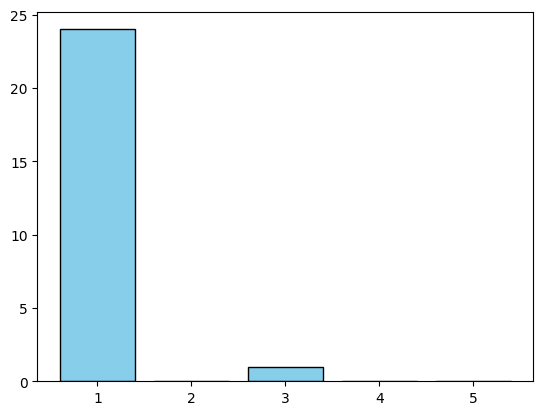

In [88]:
# Reshufffle the llm_answers and then grade them again to see if the grades will be lower
shuffled_llm_answers = np.random.permutation(llm_answers)
shuffled_llm_results = []
for llm_answer, question in zip(shuffled_llm_answers, open_ended_questions):
    print("LLM Answer: ", llm_answer)
    print("Question: ", question.question)
    print("Correct Answer: ", question.example_correct_answers)

    grade = question.validate_answer(llm_answer, llm)
    print("LLM Grade: ", grade)
    shuffled_llm_results.append(grade)
# plot grade results on scale from 1 to 5
plt.hist(shuffled_llm_results, bins=np.arange(1, 7) - 0.5, rwidth=0.8, color='skyblue', edgecolor='black')

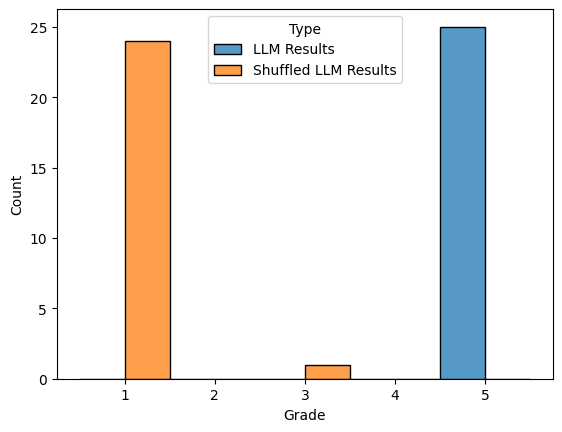

In [89]:

# Combine the results into a single DataFrame for seaborn
results_df = pd.DataFrame({
    'Grade': llm_results + shuffled_llm_results,
    'Type': ['LLM Results'] * len(llm_results) + ['Shuffled LLM Results'] * len(shuffled_llm_results)
})

# Plot using seaborn histplot with hue
sns.histplot(data=results_df, x='Grade', hue='Type', multiple='dodge', bins=np.arange(1, 7) - 0.5, edgecolor='black')
plt.show()

# Can LLM generate the question given some context?

In [90]:
generated_questions = []
for context_data in open_ended_questions:
    question = context_data.generate_question_from_context(llm)
    generated_questions.append(question)

# Display the generated questions along with their contexts
for context, question in zip(open_ended_questions, generated_questions):
    print(f"Context: {context}")
    print(f"Generated Question: {question}")
    print("\n")

Context: question='What does most of the HD material use as a standard?' example_correct_answers=['DVB-S2', 'DVB-S2', 'DVB-compliant MPEG-2'] context="BSkyB's standard definition broadcasts are in DVB-compliant MPEG-2, with the Sky Movies and Sky Box Office channels including optional Dolby Digital soundtracks for recent films, although these are only accessible with a Sky+ box. Sky+ HD material is broadcast using MPEG-4 and most of the HD material uses the DVB-S2 standard. Interactive services and 7-day EPG use the proprietary OpenTV system, with set-top boxes including modems for a return path. Sky News, amongst other channels, provides a pseudo-video on demand interactive service by broadcasting looping video streams."
Generated Question: What technology does BSkyB use for broadcasting its standard definition and HD material, and what system is used for interactive services and the 7-day EPG?


Context: question='What physical quantities do not have direction?' example_correct_answe

# Example of full flow in the pipeline for open ended question answering

In [91]:
ba_description = OpenEndedQuestion(question="", example_correct_answers=[], context="The Barabási–Albert (BA) model is an algorithm for generating random scale-free networks using a preferential attachment mechanism. Several natural and human-made systems, including the Internet, the World Wide Web, citation networks, and some social networks are thought to be approximately scale-free and certainly contain few nodes (called hubs) with unusually high degree as compared to the other nodes of the network. The BA model tries to explain the existence of such nodes in real networks. The algorithm is named for its inventors Albert-László Barabási and Réka Albert.")

In [92]:
llm_question = ba_description.generate_question_from_context(llm)
llm_question

'What is the Barabási–Albert model, and how does it explain the presence of hubs in real-world networks?'

In [93]:
ba_description.question = llm_question
llm_answer = ba_description.generate_llm_response(llm)
llm_answer

'The Barabási–Albert model is an algorithm for generating random scale-free networks using a preferential attachment mechanism. It explains the presence of hubs in real-world networks by suggesting that new nodes are more likely to connect to existing nodes with a higher degree, leading to the formation of a few nodes with unusually high connectivity.'

In [94]:
ba_description.example_correct_answers = ["The Barabási–Albert (BA) model is an algorithm for generating random scale-free networks using a preferential attachment mechanism.", "The Barabási–Albert model is a way to build networks with a “rich-get-richer” link structure, producing scale-free networks that match real systems like the Web, social media, and citation networks."]
grade = ba_description.validate_answer(llm_answer, llm)
grade


5

# Multiple choice question answering

In [10]:
ba_close_ended = CloseEndedQuestion(context="The Barabási–Albert (BA) model is an algorithm for generating random scale-free networks using a preferential attachment mechanism. Several natural and human-made systems, including the Internet, the World Wide Web, citation networks, and some social networks are thought to be approximately scale-free and certainly contain few nodes (called hubs) with unusually high degree as compared to the other nodes of the network. The BA model tries to explain the existence of such nodes in real networks. The algorithm is named for its inventors Albert-László Barabási and Réka Albert.")

question_result = ba_close_ended.generate_question_from_context(llm)
print(question_result.question)
print(question_result.choices)
print(question_result.correct_answer)


What is the primary mechanism used by the Barabási–Albert model to generate scale-free networks?
['Random attachment', 'Preferential attachment', 'Uniform attachment', 'Sequential attachment']
1


In [11]:
ba_close_ended.question = question_result

In [12]:
llm_answer = ba_close_ended.generate_llm_response(llm)
ba_close_ended.validate_answer(llm_answer.index)

5

# Can LLM generate the closed ended question given some context?

In [28]:
SAMPLE_SIZE = 25

sample_df = df.sample(n=SAMPLE_SIZE, random_state=32)
close_ended_questions = CloseEndedQuestion.from_dataframe(sample_df)

generated_questions = []

for context_data in close_ended_questions:
    question_result = context_data.generate_question_from_context(llm)
    generated_questions.append(question_result)

# Display the generated questions along with their contexts
for context, question in zip(close_ended_questions, generated_questions):
    print(f"Context: {context}")
    print(f"Generated Question: {question.question}")
    print(f"Choices: {question.choices}")
    print(f"Correct Answer: {question.correct_answer}")
    print("\n")

Context: context="BSkyB's standard definition broadcasts are in DVB-compliant MPEG-2, with the Sky Movies and Sky Box Office channels including optional Dolby Digital soundtracks for recent films, although these are only accessible with a Sky+ box. Sky+ HD material is broadcast using MPEG-4 and most of the HD material uses the DVB-S2 standard. Interactive services and 7-day EPG use the proprietary OpenTV system, with set-top boxes including modems for a return path. Sky News, amongst other channels, provides a pseudo-video on demand interactive service by broadcasting looping video streams." question=None
Generated Question: What technology does BSkyB use for broadcasting its standard definition channels?
Choices: ['DVB-compliant MPEG-2', 'MPEG-4', 'DVB-S2', 'OpenTV']
Correct Answer: 0


Context: context='Forces act in a particular direction and have sizes dependent upon how strong the push or pull is. Because of these characteristics, forces are classified as "vector quantities". This